,Date,Close
0,2006-01-03,40.91
1,2006-01-04,40.97
2,2006-01-05,41.53
3,2006-01-06,43.21
4,2006-01-09,43.42


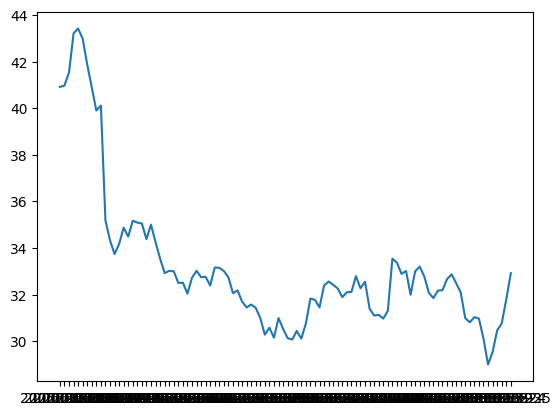

In [11]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import torch
import torch.nn as nn

def parser(x):
 return pd.datetime.strptime('190'+x, '%Y-%m')
df1 = pd.read_csv("archive/AABA_2006-01-01_to_2018-01-01.csv")[["Date","Close"]]
df2 = pd.read_csv("archive/AAPL_2006-01-01_to_2018-01-01.csv")[["Date","Close"]]
#pd.to_datetime(df1["Date"])


df1_test = df1.iloc[:100]

plt.plot(df1_test["Date"],df1_test["Close"])
df1_test.head()

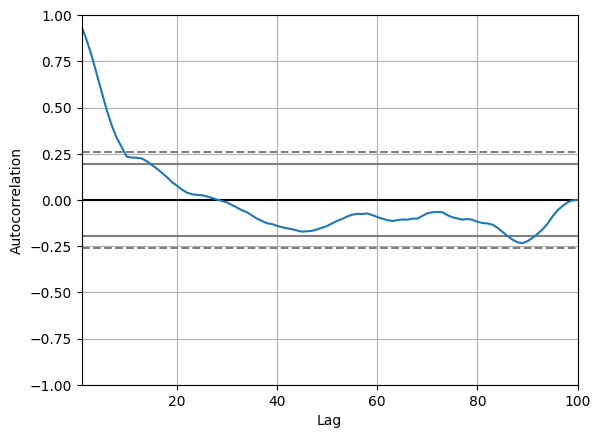

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1_test["Close"])
plt.show()

# ARIMA

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  100
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -115.201
Date:                Mon, 15 Jan 2024   AIC                            242.401
Time:                        17:59:38   BIC                            257.972
Sample:                             0   HQIC                           248.701
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1333      0.178      0.751      0.453      -0.215       0.481
ar.L2          0.1064      0.180      0.592      0.554      -0.246       0.459
ar.L3         -0.0331      0.152     -0.218      0.8

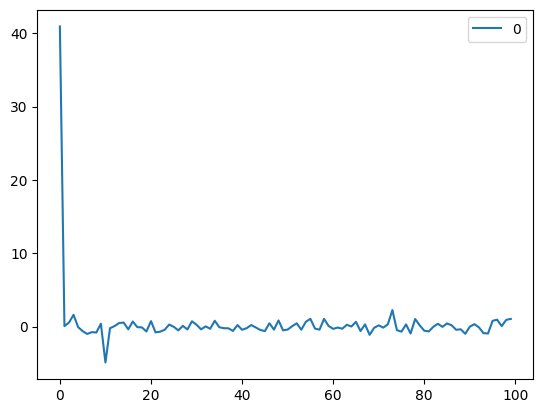

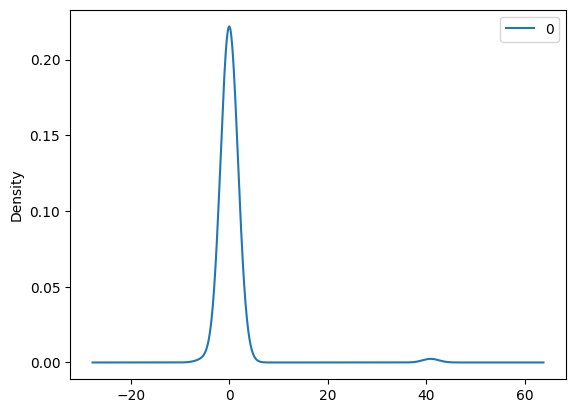

                0
count  100.000000
mean     0.350449
std      4.169079
min     -4.895467
25%     -0.436663
50%     -0.072063
75%      0.342495
max     40.910000


In [16]:
from statsmodels.tsa.arima.model import ARIMA
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')

# fit model
model = ARIMA(df1_test["Close"], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())